In [68]:
import SimpleITK as sitk
import os 
import matplotlib.pyplot as plt
import numpy as np

In [62]:
tumor_dir = "../../Data/All_CT/Tumor"
all_tumor_files = os.listdir(tumor_dir)
tumor_files_mhd = [x for x in all_tumor_files if "mhd" in x]
# Remove tumors that don't have corresponding liver image (confirmed externally)
tumor_files_mhd.remove('005_ICCrecurrence_Tumor.mhd')
tumor_files_mhd.remove('057_ICCrecurrence_Tumor.mhd')
tumor_files_mhd.sort()

liver_dir = "../../Data/All_CT/Liver"
all_liver_files = os.listdir(liver_dir)
liver_files_mhd = [y for y in all_liver_files if "mhd" in y]
liver_files_mhd.sort()

print("Tumor file count: ", len(tumor_files_mhd))
print("Liver file count: ", len(liver_files_mhd))

Tumor file count:  441
Liver file count:  441


In [83]:
tumor_img_path = os.path.join(tumor_dir, tumor_files_mhd[0])
tumor_mhd_image = sitk.ReadImage(tumor_img_path, imageIO="MetaImageIO")
tumor_img_arr = sitk.GetArrayFromImage(tumor_mhd_image)

tumor_mask = ~(tumor_img_arr != -1000)
tumor_mask = tumor_mask.astype(float)

# Confirm mask is correct shape
print("Tumor image shape: ", tumor_img_arr.shape)
print("Tumor mask shape: ", tumor_mask.shape)


liver_img_path = os.path.join(liver_dir, liver_files_mhd[0])
liver_mhd_image = sitk.ReadImage(liver_img_path, imageIO="MetaImageIO")
liver_img_arr = sitk.GetArrayFromImage(liver_mhd_image)

liver_mask = ~(liver_img_arr != -1000)
liver_mask = liver_mask.astype(float)

# Confirm mask is correct shape
print("Liver image shape: ", tumor_img_arr.shape)
print("Liver mask shape: ", tumor_mask.shape)

print(tumor_img_path)
print(liver_img_path)

Tumor image shape:  (49, 512, 512)
Tumor mask shape:  (49, 512, 512)
Liver image shape:  (49, 512, 512)
Liver mask shape:  (49, 512, 512)
../../Data/All_CT/Tumor/001-hcc_hcctumor1.mhd
../../Data/All_CT/Liver/001-hcc_liver_segmented.mhd


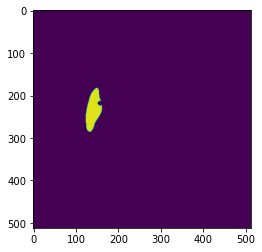

In [92]:
# Trying to mask tumor out of liver

notum_livmask = liver_mask - tumor_mask

# Make mask version that has -1000 for tumor to make into background in liver image
tum_mask_bckgd = (1 - tumor_mask) * -1000

# Mask out the tumor pixels to 0, then add -1000 to set as background
notum_liv = liver_img_arr * tumor_mask + tum_mask_bckgd

plt.imshow(notum_liv[9,:,:])

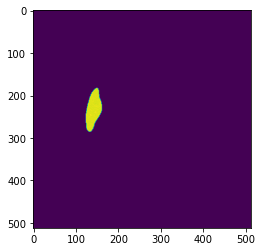

In [91]:
plt.imshow(liver_img_arr[9,:,:]) #, cmap='gray', vmin=-100, vmax=300)
# plt.imshow(liver_mask[9,:,:], cmap='gray')

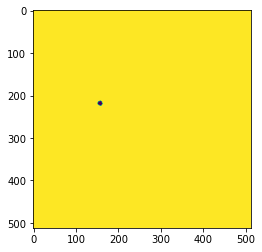

In [90]:
# plt.imshow(tumor_img_arr[9,:,:], cmap='gray', vmin=-100, vmax=300)
plt.imshow(tumor_mask[9, :, :])

In [71]:
tumor_mask.nonzero()

(array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7, 